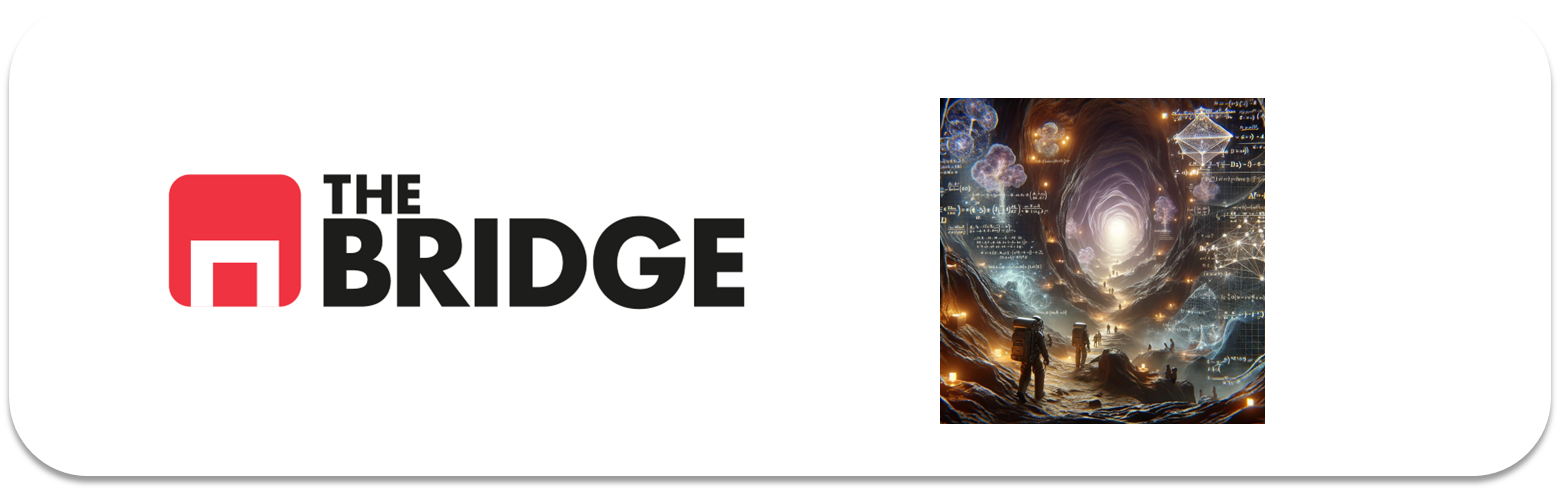

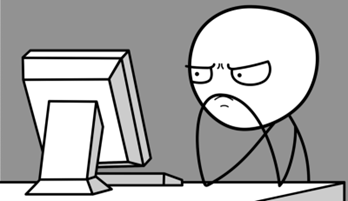

Para ejercitarte y afianzar lo aprendido sobre **Keras y DL**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Predecir eficiencia de gasolina

En este conjuntos de ejercicios vamos a trabajar sobre el set de datos clasico [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) para construir un modelo DL para predecir el consumo de vehiculos de 1970 y 1980. Para hacer esto proveeremos el modelo con una descripcion de muchos automoviles de ese periodo. Esta descripcion incluye atributos como: Cilindros, desplazamiento, potencia y peso.

El objetivo de este ejercicio es predecir el target miles per galon (MPG), que vendría a representar las millas por galón de combustible.

Para la construcción del modelo vamos a utilizar Keras.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [93]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


### Ejercicio 1

Carga los datos en un dataframe, utilizando como nombre de columnas los siguientes:

```python
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']
``` 


In [75]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin',"Car Name"]

df_cars = pd.read_csv('./data/Autos_data.txt', sep="\s+", names=column_names,index_col=False)

df_cars.head()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### Ejercicio 2: Limpieza inicial

Echa un primer vistazo. Limpia columnas "raras". Deshazte de nulos (cuidado aquí), arregla el tipo de las features numéricas si fuera necesario. Haz una lista de las features categóricas que tuvieramos que convertir posteriormente. (Es antes del split pero no importa para este ejercicio)

In [76]:
df_cars["Horsepower"]=df_cars["Horsepower"].replace("?", pd.NA)
df_cars=df_cars.dropna()  
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    object 
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
 8   Car Name      392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [77]:
df_cars["Horsepower"]=df_cars["Horsepower"].astype("float64")

In [78]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
 8   Car Name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [79]:
df_cars.duplicated().value_counts()

False    392
Name: count, dtype: int64

In [80]:
features_cat=[]
for col, nunique in df_cars.nunique().items():
    print(col, nunique)
    if nunique < 10:
        features_cat.append(col)
features_cat

MPG 127
Cylinders 5
Displacement 81
Horsepower 93
Weight 346
Acceleration 95
Model Year 13
Origin 3
Car Name 301


['Cylinders', 'Origin']

### Ejercicio 3

Antes de seguir nos informan que las etiquetas de "origin" correspoden a  USA para el 1, Europa para el 2 y Japón para el 3. Convierte origin a esos valores porque queremos tener el literal. Luego haz directamente un one-hot encoding de esas variable.  

*NOTA: Realmente los one-hot-encoding se pueden hacer contra el dataset original desde el principio (no afectan unos a otros), si nos los hacemos es porque hasta que no se han analizado las variables puede que no tengamos claro que queremos hacer si una codificación ordinal, una vectorización (onehot) o bien queremos hacer otro cambio en la variable y esos vienen dados por la relación de la categórica con el target y por tanto sólo se pueden ver en el train. Pero si por lo que sea sabemos seguros que vamos a hacer vectorización no hay problema en hacerlo antes del split. Por otro lado, siempre conviene quedarse con una categoria unkown para valores que pueden llegar en el futuro antes de un recalibrado.*


In [81]:
df_cars["Origin"].value_counts()

Origin
1    245
3     79
2     68
Name: count, dtype: int64

In [82]:
df_cars["Origin"]=df_cars["Origin"].replace({1:"USA",2:"EU",3:"JAP"})

In [83]:
df_cars["Origin"].value_counts()

Origin
USA    245
JAP     79
EU      68
Name: count, dtype: int64

In [84]:
df_cars= pd.get_dummies(df_cars,columns=["Origin"],dtype=int)

In [85]:
df_cars

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Car Name,Origin_EU,Origin_JAP,Origin_USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,ford mustang gl,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,vw pickup,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,dodge rampage,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,ford ranger,0,0,1


In [86]:
features_cat=[]
for col, nunique in df_cars.nunique().items():
    print(col, nunique)
    if nunique < 10:
        features_cat.append(col)
features_cat

MPG 127
Cylinders 5
Displacement 81
Horsepower 93
Weight 346
Acceleration 95
Model Year 13
Car Name 301
Origin_EU 2
Origin_JAP 2
Origin_USA 2


['Cylinders', 'Origin_EU', 'Origin_JAP', 'Origin_USA']

### Ejercicio 4

Divide los datos en train y test. Ahora divida el set de datos en un set de entrenamiento y otro de pruebas. 80% para entrenamiento

Usaremos el set de pruebas en la evaluacion final de nuestro modelo. Emplea una variable target para guardar el nombre de la columna target.

NOTA: El resultado tienen que ser dos datasets

In [87]:
df_cars=df_cars.drop(columns="Car Name")
target = "MPG"  
train_set, test_set = train_test_split(df_cars, test_size=0.2, random_state=42)

### Ejercicio 5

Inspecciona los datos. Revisa rápidamente la distribución conjunta del dataset de entrenamiento mediante un grid de gráficos

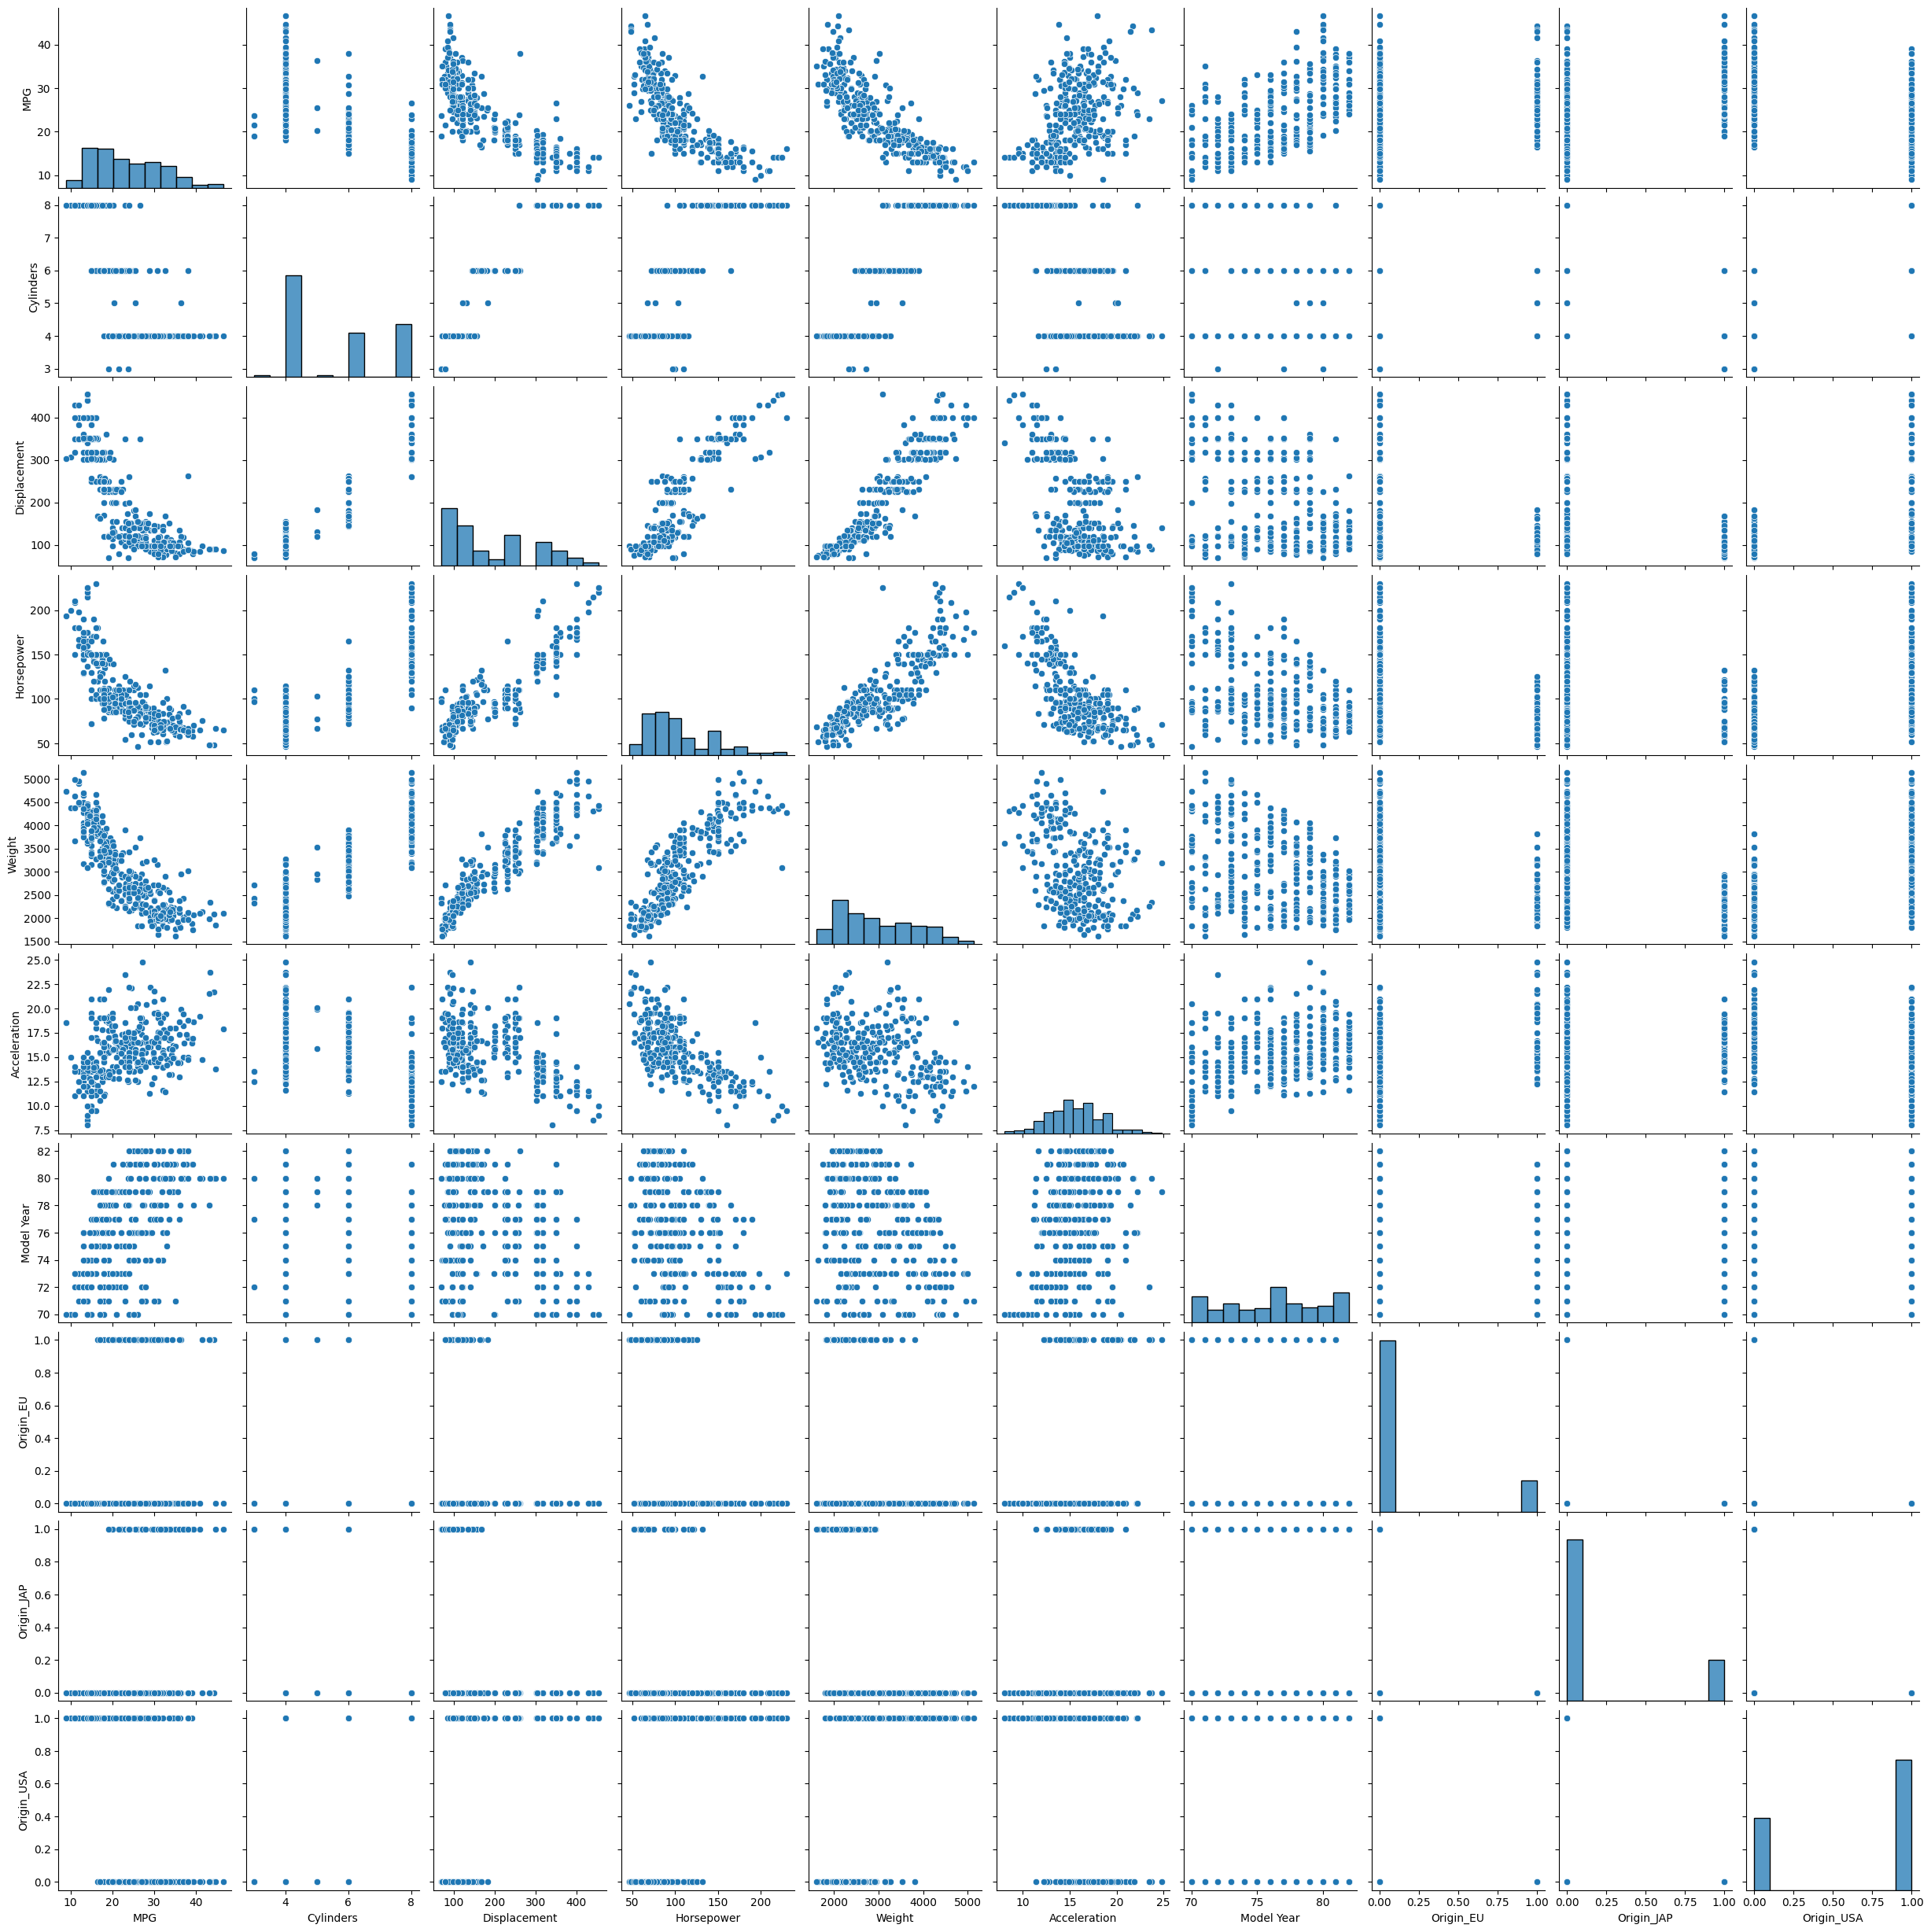

In [88]:
sns.pairplot(train_set)
plt.show()

### Ejercicio 6 

Independientemente de lo que hayas encontrado en el análisis anterior, vamos a utilizar todas las features y antes las vamos a escalar. Estandardiza train y test.

In [92]:
from sklearn.preprocessing import StandardScaler

X_train = train_set.drop(columns=[target])
y_train = train_set[target]

X_test = test_set.drop(columns=[target])
y_test = test_set[target]


scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled =scaler.transform(X_train)
X_test_scaled =scaler.transform(X_test)

X_train_scaled

array([[ 0.30486156,  0.28457757,  0.14142863, ..., -0.42559614,
        -0.50199602,  0.74128601],
       [-0.87318372, -0.53588042, -0.32949862, ..., -0.42559614,
        -0.50199602,  0.74128601],
       [ 0.30486156, -0.23665456, -0.19868549, ..., -0.42559614,
        -0.50199602,  0.74128601],
       ...,
       [-0.87318372, -0.4297035 , -0.51263699, ..., -0.42559614,
        -0.50199602,  0.74128601],
       [-0.87318372, -0.94128319, -1.0358895 , ..., -0.42559614,
        -0.50199602,  0.74128601],
       [ 1.48290683,  1.97375578,  1.18793363, ..., -0.42559614,
        -0.50199602,  0.74128601]])

## El modelo

### Ejercicio 7: Construye el modelo con Keras

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `secuencial` con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo. Es decir una MLP con dos capas ocultas.

Por tanto, tendrá tres capas. Una inicial con activación relu (usa el argumento `input_shape` para darle el número de features). Otra hidden layer con activación relu y la de salida de regresión, que se compondrá de una única neurona. Pon las neuronas que consideres interesantes para las dos primeras capas (NOTA: En este caso partimos de pocas features, por lo que puede ser interesante poner 2 o 3 como mínimo el número de features para poder obtener unas pseudofeatures que intenten capturar las interrelaciones.)

Otros datos:

Para el compile utiliza un loss='mse'.

optimizer = `tf.keras.optimizers.RMSprop(0.001)`

Y en metrics añade en una lista el `mae` y `mse`.

Utiliza una aproximación en prisma (mismo numero de unidades en las capas ocultas)

In [94]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
                       ])

model.compile(loss="mean_squared_error",
              optimizer=tf.keras.optimizers.RMSprop(0.001),
              metrics = ["mean_squared_error","mean_absolute_error"])
                    


c:\Users\Guillermo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Ejercicio 8

Inspecciona el modelo usando el método `.summary` para imprimir una descripción simple del modelo

In [96]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,261 (4.93 KB)

 Trainable params: 1,261 (4.93 KB)

 Non-trainable params: 0 (0.00 B)

### Ejercicio 9 Entrenar el modelo

Entrena el modelo para 1000 epochs y guarda los resultados del entrenamiento en una variable llamada `history`.
Emplea en el entrenamiento un 20% de los datos para validación, mediante el argumento `validation_split`.

In [97]:
history = model.fit(X_train_scaled, y_train, epochs=1000,validation_split=0.2)

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 624.4750 - mean_absolute_error: 23.5661 - mean_squared_error: 624.4750 - val_loss: 660.2972 - val_mean_absolute_error: 24.4103 - val_mean_squared_error: 660.2972
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 579.4852 - mean_absolute_error: 22.6881 - mean_squared_error: 579.4852 - val_loss: 640.9736 - val_mean_absolute_error: 24.0013 - val_mean_squared_error: 640.9736
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 553.3483 - mean_absolute_error: 22.0459 - mean_squared_error: 553.3483 - val_loss: 621.1991 - val_mean_absolute_error: 23.5780 - val_mean_squared_error: 621.1991
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 543.2142 - mean_absolute_error: 21.6918 - mean_squared_error: 543.2142 - val_loss: 599.8328 - val_mean_absolute_error: 23.1179 - val_mean_squared_error: 599.8328
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 538.9025 - mean_absolute_error: 21.6739 - mean_squared_er

### Ejercicio 10

Visualiza el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`. Muestra la evolución del error en train y validation por un lado, y la evolución de la pérdida (loss), también train contra validation, en otra.

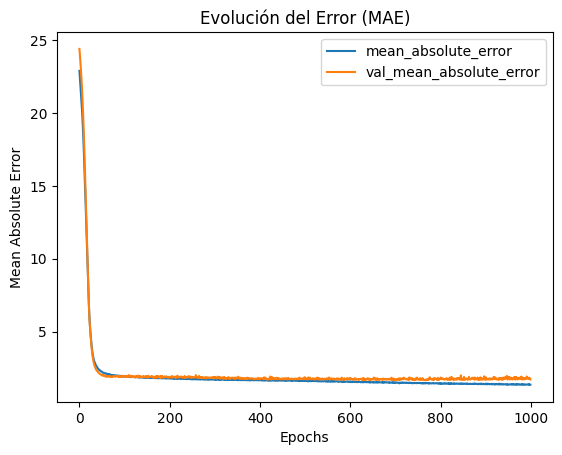

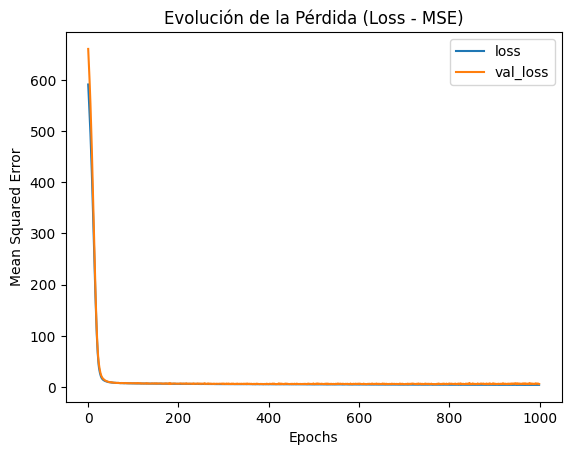

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)
history_df[["mean_absolute_error", "val_mean_absolute_error"]].plot(title="Evolución del Error (MAE)")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")

history_df[["loss", "val_loss"]].plot(title="Evolución de la Pérdida (Loss - MSE)")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")

plt.show()

### Ejercicio 11

Comenta las gráficas anteriores.

In [ ]:
#De las graficas se extrae que no es util hacer tantas epocas puesto que los valores de las metricas no mejoran apenas a partir de consumir menos de un 10% de ellas

### Ejercicio 12

Independientemente de lo comentado en 11, vamos a añadir un callback al entrenamiento. Para ello, construye el modelo otra vez y vuelve a compilarlo (si no lo haces, como ya sabes comenzará el entrenamiento donde lo dejó y no nos valdrá el callback para nada). Entrena el modelo con los mismos hiperparámetros del ejercicio 10 y pinta la gráfica de evolución de los errores e interprétalo (obten el MAE medio una vez "estabilizado" el entrenamiento).  

Para el earlystopping utiliza un margen de 20 epochs.

In [105]:
model_cb = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
                       ])

model_cb.compile(loss="mean_squared_error",
              optimizer=tf.keras.optimizers.RMSprop(0.001),
              metrics = ["mean_squared_error","mean_absolute_error"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.h5",save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
                    
history_cb = model_cb.fit(X_train_scaled, y_train, epochs=1000,validation_split=0.2,callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/1000


c:\Users\Guillermo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - loss: 458.1208 - mean_absolute_error: 20.2946 - mean_squared_error: 458.1208

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 570.4291 - mean_absolute_error: 22.5594 - mean_squared_error: 570.4291 - val_loss: 660.3350 - val_mean_absolute_error: 24.4887 - val_mean_squared_error: 660.3350
Epoch 2/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 633.7585 - mean_absolute_error: 23.6977 - mean_squared_error: 633.7585

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 584.2147 - mean_absolute_error: 22.7870 - mean_squared_error: 584.2147 - val_loss: 640.9044 - val_mean_absolute_error: 24.0992 - val_mean_squared_error: 640.9044
Epoch 3/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 616.5415 - mean_absolute_error: 23.4939 - mean_squared_error: 616.5415

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 568.4373 - mean_absolute_error: 22.4150 - mean_squared_error: 568.4373 - val_loss: 619.7927 - val_mean_absolute_error: 23.6739 - val_mean_squared_error: 619.7927
Epoch 4/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 583.1617 - mean_absolute_error: 22.3669 - mean_squared_error: 583.1617

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 533.4194 - mean_absolute_error: 21.6515 - mean_squared_error: 533.4194 - val_loss: 595.9938 - val_mean_absolute_error: 23.1862 - val_mean_squared_error: 595.9938
Epoch 5/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 510.3322 - mean_absolute_error: 21.4942 - mean_squared_error: 510.3322

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 521.2787 - mean_absolute_error: 21.4914 - mean_squared_error: 521.2787 - val_loss: 570.3713 - val_mean_absolute_error: 22.6439 - val_mean_squared_error: 570.3713
Epoch 6/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 442.4961 - mean_absolute_error: 19.8098 - mean_squared_error: 442.4961

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 462.0972 - mean_absolute_error: 20.1646 - mean_squared_error: 462.0972 - val_loss: 541.6000 - val_mean_absolute_error: 22.0294 - val_mean_squared_error: 541.6000
Epoch 7/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 461.9410 - mean_absolute_error: 20.1541 - mean_squared_error: 461.9410

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 479.1916 - mean_absolute_error: 20.4850 - mean_squared_error: 479.1916 - val_loss: 510.7002 - val_mean_absolute_error: 21.3499 - val_mean_squared_error: 510.7002
Epoch 8/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 430.3415 - mean_absolute_error: 18.8769 - mean_squared_error: 430.3415

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 445.5551 - mean_absolute_error: 19.5391 - mean_squared_error: 445.5551 - val_loss: 476.5884 - val_mean_absolute_error: 20.5846 - val_mean_squared_error: 476.5884
Epoch 9/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 430.2803 - mean_absolute_error: 19.1931 - mean_squared_error: 430.2803

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 411.8445 - mean_absolute_error: 18.8506 - mean_squared_error: 411.8445 - val_loss: 440.0632 - val_mean_absolute_error: 19.7338 - val_mean_squared_error: 440.0632
Epoch 10/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 407.3997 - mean_absolute_error: 18.5665 - mean_squared_error: 407.3997

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 361.7425 - mean_absolute_error: 17.5328 - mean_squared_error: 361.7425 - val_loss: 401.2353 - val_mean_absolute_error: 18.7880 - val_mean_squared_error: 401.2353
Epoch 11/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 376.4702 - mean_absolute_error: 18.1762 - mean_squared_error: 376.4702

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 340.8521 - mean_absolute_error: 16.9544 - mean_squared_error: 340.8521 - val_loss: 362.3327 - val_mean_absolute_error: 17.7843 - val_mean_squared_error: 362.3327
Epoch 12/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 300.5639 - mean_absolute_error: 15.7211 - mean_squared_error: 300.5639

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 301.7038 - mean_absolute_error: 15.8475 - mean_squared_error: 301.7038 - val_loss: 322.1430 - val_mean_absolute_error: 16.6798 - val_mean_squared_error: 322.1430
Epoch 13/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 298.1225 - mean_absolute_error: 16.2840 - mean_squared_error: 298.1225

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 270.7336 - mean_absolute_error: 15.0992 - mean_squared_error: 270.7336 - val_loss: 281.8864 - val_mean_absolute_error: 15.4947 - val_mean_squared_error: 281.8864
Epoch 14/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 232.3234 - mean_absolute_error: 13.8031 - mean_squared_error: 232.3234

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 225.4682 - mean_absolute_error: 13.3935 - mean_squared_error: 225.4682 - val_loss: 241.5231 - val_mean_absolute_error: 14.2373 - val_mean_squared_error: 241.5231
Epoch 15/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 262.9288 - mean_absolute_error: 14.6506 - mean_squared_error: 262.9288

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 206.4235 - mean_absolute_error: 12.8463 - mean_squared_error: 206.4235 - val_loss: 204.3384 - val_mean_absolute_error: 12.9643 - val_mean_squared_error: 204.3384
Epoch 16/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 161.4748 - mean_absolute_error: 11.1300 - mean_squared_error: 161.4748

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 158.1658 - mean_absolute_error: 11.0107 - mean_squared_error: 158.1658 - val_loss: 168.7097 - val_mean_absolute_error: 11.6483 - val_mean_squared_error: 168.7097
Epoch 17/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 117.0688 - mean_absolute_error: 9.3413 - mean_squared_error: 117.0688

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 121.3133 - mean_absolute_error: 9.5759 - mean_squared_error: 121.3133 - val_loss: 136.2307 - val_mean_absolute_error: 10.3049 - val_mean_squared_error: 136.2307
Epoch 18/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 107.8322 - mean_absolute_error: 9.1296 - mean_squared_error: 107.8322

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 103.0212 - mean_absolute_error: 8.7571 - mean_squared_error: 103.0212 - val_loss: 108.9501 - val_mean_absolute_error: 8.9913 - val_mean_squared_error: 108.9501
Epoch 19/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 55.2670 - mean_absolute_error: 6.1762 - mean_squared_error: 55.2670

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 70.9715 - mean_absolute_error: 7.1165 - mean_squared_error: 70.9715 - val_loss: 85.6914 - val_mean_absolute_error: 7.7007 - val_mean_squared_error: 85.6914
Epoch 20/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 66.6596 - mean_absolute_error: 7.2996 - mean_squared_error: 66.6596

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 59.6785 - mean_absolute_error: 6.5267 - mean_squared_error: 59.6785 - val_loss: 68.8010 - val_mean_absolute_error: 6.7425 - val_mean_squared_error: 68.8010
Epoch 21/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 67.8431 - mean_absolute_error: 7.4318 - mean_squared_error: 67.8431

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 53.5471 - mean_absolute_error: 6.1273 - mean_squared_error: 53.5471 - val_loss: 56.5627 - val_mean_absolute_error: 6.1124 - val_mean_squared_error: 56.5627
Epoch 22/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 51.3310 - mean_absolute_error: 5.9477 - mean_squared_error: 51.3310

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 41.6767 - mean_absolute_error: 5.3154 - mean_squared_error: 41.6767 - val_loss: 47.3322 - val_mean_absolute_error: 5.6412 - val_mean_squared_error: 47.3322
Epoch 23/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 46.7436 - mean_absolute_error: 6.0633 - mean_squared_error: 46.7436

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 38.0517 - mean_absolute_error: 5.1720 - mean_squared_error: 38.0517 - val_loss: 41.7798 - val_mean_absolute_error: 5.2508 - val_mean_squared_error: 41.7798
Epoch 24/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 38.1779 - mean_absolute_error: 5.1546 - mean_squared_error: 38.1779

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 31.4229 - mean_absolute_error: 4.5916 - mean_squared_error: 31.4229 - val_loss: 37.3143 - val_mean_absolute_error: 4.9368 - val_mean_squared_error: 37.3143
Epoch 25/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 41.3079 - mean_absolute_error: 5.2902 - mean_squared_error: 41.3079

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 31.2281 - mean_absolute_error: 4.5345 - mean_squared_error: 31.2281 - val_loss: 33.7046 - val_mean_absolute_error: 4.6369 - val_mean_squared_error: 33.7046
Epoch 26/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 27.5673 - mean_absolute_error: 3.9953 - mean_squared_error: 27.5673

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 25.4878 - mean_absolute_error: 4.0448 - mean_squared_error: 25.4878 - val_loss: 30.8321 - val_mean_absolute_error: 4.3676 - val_mean_squared_error: 30.8321
Epoch 27/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 21.5442 - mean_absolute_error: 3.8309 - mean_squared_error: 21.5442

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 24.4861 - mean_absolute_error: 4.0132 - mean_squared_error: 24.4861 - val_loss: 28.3189 - val_mean_absolute_error: 4.1303 - val_mean_squared_error: 28.3189
Epoch 28/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 20.4698 - mean_absolute_error: 3.7415 - mean_squared_error: 20.4698

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 21.4969 - mean_absolute_error: 3.7763 - mean_squared_error: 21.4969 - val_loss: 25.8107 - val_mean_absolute_error: 3.9040 - val_mean_squared_error: 25.8107
Epoch 29/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 21.4934 - mean_absolute_error: 3.4715 - mean_squared_error: 21.4934

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 21.6258 - mean_absolute_error: 3.6707 - mean_squared_error: 21.6258 - val_loss: 23.8584 - val_mean_absolute_error: 3.7020 - val_mean_squared_error: 23.8584
Epoch 30/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 18.3910 - mean_absolute_error: 3.4298 - mean_squared_error: 18.3910

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 19.1872 - mean_absolute_error: 3.4664 - mean_squared_error: 19.1872 - val_loss: 22.1940 - val_mean_absolute_error: 3.5172 - val_mean_squared_error: 22.1940
Epoch 31/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 20.0913 - mean_absolute_error: 3.3631 - mean_squared_error: 20.0913

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 17.6627 - mean_absolute_error: 3.2512 - mean_squared_error: 17.6627 - val_loss: 20.6500 - val_mean_absolute_error: 3.3561 - val_mean_squared_error: 20.6500
Epoch 32/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 21.1318 - mean_absolute_error: 3.4843 - mean_squared_error: 21.1318

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 17.3315 - mean_absolute_error: 3.2614 - mean_squared_error: 17.3315 - val_loss: 19.2982 - val_mean_absolute_error: 3.2086 - val_mean_squared_error: 19.2982
Epoch 33/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 30.4475 - mean_absolute_error: 4.4840 - mean_squared_error: 30.4475

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 19.5696 - mean_absolute_error: 3.4579 - mean_squared_error: 19.5696 - val_loss: 17.8051 - val_mean_absolute_error: 3.0138 - val_mean_squared_error: 17.8051
Epoch 34/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 15.7603 - mean_absolute_error: 3.2586 - mean_squared_error: 15.7603

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16.4933 - mean_absolute_error: 3.2160 - mean_squared_error: 16.4933 - val_loss: 16.7317 - val_mean_absolute_error: 2.9007 - val_mean_squared_error: 16.7317
Epoch 35/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 8.8068 - mean_absolute_error: 2.3519 - mean_squared_error: 8.8068

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 13.8883 - mean_absolute_error: 2.8381 - mean_squared_error: 13.8883 - val_loss: 15.9874 - val_mean_absolute_error: 2.8192 - val_mean_squared_error: 15.9874
Epoch 36/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 13.4890 - mean_absolute_error: 2.8914 - mean_squared_error: 13.4890

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 13.3039 - mean_absolute_error: 2.8387 - mean_squared_error: 13.3039 - val_loss: 14.8044 - val_mean_absolute_error: 2.6731 - val_mean_squared_error: 14.8044
Epoch 37/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.9057 - mean_absolute_error: 2.4663 - mean_squared_error: 9.9057

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.9606 - mean_absolute_error: 2.7289 - mean_squared_error: 11.9606 - val_loss: 13.8645 - val_mean_absolute_error: 2.5704 - val_mean_squared_error: 13.8645
Epoch 38/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 15.4059 - mean_absolute_error: 2.8316 - mean_squared_error: 15.4059

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.3846 - mean_absolute_error: 2.7424 - mean_squared_error: 12.3846 - val_loss: 13.1761 - val_mean_absolute_error: 2.5034 - val_mean_squared_error: 13.1761
Epoch 39/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 13.2303 - mean_absolute_error: 2.8476 - mean_squared_error: 13.2303

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.8178 - mean_absolute_error: 2.6905 - mean_squared_error: 11.8178 - val_loss: 12.5129 - val_mean_absolute_error: 2.4282 - val_mean_squared_error: 12.5129
Epoch 40/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12.4851 - mean_absolute_error: 2.9024 - mean_squared_error: 12.4851

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.7150 - mean_absolute_error: 2.5838 - mean_squared_error: 10.7150 - val_loss: 11.9731 - val_mean_absolute_error: 2.3623 - val_mean_squared_error: 11.9731
Epoch 41/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 6.4273 - mean_absolute_error: 2.1063 - mean_squared_error: 6.4273

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.0866 - mean_absolute_error: 2.4579 - mean_squared_error: 10.0866 - val_loss: 11.4548 - val_mean_absolute_error: 2.3116 - val_mean_squared_error: 11.4548
Epoch 42/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 4.7472 - mean_absolute_error: 1.7240 - mean_squared_error: 4.7472

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.0121 - mean_absolute_error: 2.2809 - mean_squared_error: 9.0121 - val_loss: 10.9054 - val_mean_absolute_error: 2.2611 - val_mean_squared_error: 10.9054
Epoch 43/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 5.9089 - mean_absolute_error: 1.9353 - mean_squared_error: 5.9089

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.5587 - mean_absolute_error: 2.3631 - mean_squared_error: 9.5587 - val_loss: 10.4858 - val_mean_absolute_error: 2.2129 - val_mean_squared_error: 10.4858
Epoch 44/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 13.4959 - mean_absolute_error: 2.8183 - mean_squared_error: 13.4959

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.8067 - mean_absolute_error: 2.4769 - mean_squared_error: 10.8067 - val_loss: 10.2652 - val_mean_absolute_error: 2.1980 - val_mean_squared_error: 10.2652
Epoch 45/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 8.8293 - mean_absolute_error: 2.4896 - mean_squared_error: 8.8293

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.9554 - mean_absolute_error: 2.3552 - mean_squared_error: 8.9554 - val_loss: 9.6057 - val_mean_absolute_error: 2.1193 - val_mean_squared_error: 9.6057
Epoch 46/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 7.9577 - mean_absolute_error: 2.1735 - mean_squared_error: 7.9577

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.9734 - mean_absolute_error: 2.2831 - mean_squared_error: 8.9734 - val_loss: 9.1987 - val_mean_absolute_error: 2.0950 - val_mean_squared_error: 9.1987
Epoch 47/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 4.4033 - mean_absolute_error: 1.6480 - mean_squared_error: 4.4033

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.2550 - mean_absolute_error: 2.1571 - mean_squared_error: 8.2550 - val_loss: 9.0891 - val_mean_absolute_error: 2.0559 - val_mean_squared_error: 9.0891
Epoch 48/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.0450 - mean_absolute_error: 2.0416 - mean_squared_error: 7.0450

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.7862 - mean_absolute_error: 2.2014 - mean_squared_error: 8.7862 - val_loss: 9.0011 - val_mean_absolute_error: 2.0454 - val_mean_squared_error: 9.0011
Epoch 49/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 15.2776 - mean_absolute_error: 3.0256 - mean_squared_error: 15.2776

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.6255 - mean_absolute_error: 2.4369 - mean_squared_error: 10.6255 - val_loss: 8.6113 - val_mean_absolute_error: 2.0017 - val_mean_squared_error: 8.6113
Epoch 50/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 11.8165 - mean_absolute_error: 2.3652 - mean_squared_error: 11.8165

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.4926 - mean_absolute_error: 2.2670 - mean_squared_error: 9.4926 - val_loss: 8.3104 - val_mean_absolute_error: 1.9749 - val_mean_squared_error: 8.3104
Epoch 51/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 5.0495 - mean_absolute_error: 1.7216 - mean_squared_error: 5.0495

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.2247 - mean_absolute_error: 2.1299 - mean_squared_error: 8.2247 - val_loss: 8.2675 - val_mean_absolute_error: 1.9625 - val_mean_squared_error: 8.2675
Epoch 52/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.9236 - mean_absolute_error: 2.2260 - mean_squared_error: 8.9236 - val_loss: 8.2764 - val_mean_absolute_error: 1.9592 - val_mean_squared_error: 8.2764
Epoch 53/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.0491 - mean_absolute_error: 2.2237 - mean_squared_error: 9.0491 - val_loss: 8.4439 - val_mean_absolute_error: 1.9918 - val_mean_squared_error: 8.4439
Epoch 54/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 9.9844 - mean_absolute_error: 2.2283 - mean_squared_error: 9.9844

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.5147 - mean_absolute_error: 2.1645 - mean_squared_error: 8.5147 - val_loss: 7.7614 - val_mean_absolute_error: 1.8997 - val_mean_squared_error: 7.7614
Epoch 55/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.5180 - mean_absolute_error: 2.0298 - mean_squared_error: 7.5180 - val_loss: 7.9454 - val_mean_absolute_error: 1.9231 - val_mean_squared_error: 7.9454
Epoch 56/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 5.5946 - mean_absolute_error: 1.9129 - mean_squared_error: 5.5946

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.1849 - mean_absolute_error: 2.1383 - mean_squared_error: 8.1849 - val_loss: 7.7361 - val_mean_absolute_error: 1.8956 - val_mean_squared_error: 7.7361
Epoch 57/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 14.2182 - mean_absolute_error: 2.6314 - mean_squared_error: 14.2182

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.7602 - mean_absolute_error: 2.2908 - mean_squared_error: 9.7602 - val_loss: 7.4952 - val_mean_absolute_error: 1.8637 - val_mean_squared_error: 7.4952
Epoch 58/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 14.2556 - mean_absolute_error: 2.8481 - mean_squared_error: 14.2556

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.4519 - mean_absolute_error: 2.2687 - mean_squared_error: 9.4519 - val_loss: 7.4638 - val_mean_absolute_error: 1.8633 - val_mean_squared_error: 7.4638
Epoch 59/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 16.2980 - mean_absolute_error: 2.8874 - mean_squared_error: 16.2980

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 9.1023 - mean_absolute_error: 2.1837 - mean_squared_error: 9.1023 - val_loss: 7.3501 - val_mean_absolute_error: 1.8524 - val_mean_squared_error: 7.3501
Epoch 60/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.2390 - mean_absolute_error: 2.1476 - mean_squared_error: 8.2390 - val_loss: 7.4326 - val_mean_absolute_error: 1.8651 - val_mean_squared_error: 7.4326
Epoch 61/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.2250 - mean_absolute_error: 2.1781 - mean_squared_error: 8.2250 - val_loss: 7.6155 - val_mean_absolute_error: 1.8902 - val_mean_squared_error: 7.6155
Epoch 62/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 6.1093 - mean_absolute_error: 1.9910 - mean_squared_error: 6.1093

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.9627 - mean_absolute_error: 2.1207 - mean_squared_error: 7.9627 - val_loss: 7.2213 - val_mean_absolute_error: 1.8456 - val_mean_squared_error: 7.2213
Epoch 63/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.2264 - mean_absolute_error: 2.0229 - mean_squared_error: 7.2264 - val_loss: 7.3630 - val_mean_absolute_error: 1.8702 - val_mean_squared_error: 7.3630
Epoch 64/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.6888 - mean_absolute_error: 2.1034 - mean_squared_error: 7.6888 - val_loss: 7.2745 - val_mean_absolute_error: 1.8616 - val_mean_squared_error: 7.2745
Epoch 65/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 5.2953 - mean_absolute_error: 1.8329 - mean_squared_error: 5.2953

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.6633 - mean_absolute_error: 2.0802 - mean_squared_error: 7.6633 - val_loss: 7.0135 - val_mean_absolute_error: 1.8237 - val_mean_squared_error: 7.0135
Epoch 66/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.5771 - mean_absolute_error: 2.1712 - mean_squared_error: 8.5771 - val_loss: 7.0195 - val_mean_absolute_error: 1.8287 - val_mean_squared_error: 7.0195
Epoch 67/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.7600 - mean_absolute_error: 1.7293 - mean_squared_error: 7.7600

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.9584 - mean_absolute_error: 2.0389 - mean_squared_error: 7.9584 - val_loss: 6.9184 - val_mean_absolute_error: 1.8138 - val_mean_squared_error: 6.9184
Epoch 68/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.4945 - mean_absolute_error: 2.2354 - mean_squared_error: 8.4945 - val_loss: 7.1056 - val_mean_absolute_error: 1.8508 - val_mean_squared_error: 7.1056
Epoch 69/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 4.5907 - mean_absolute_error: 1.5923 - mean_squared_error: 4.5907

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.0240 - mean_absolute_error: 1.9347 - mean_squared_error: 7.0240 - val_loss: 6.8468 - val_mean_absolute_error: 1.7997 - val_mean_squared_error: 6.8468
Epoch 70/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.7264 - mean_absolute_error: 2.1738 - mean_squared_error: 8.7264 - val_loss: 7.2751 - val_mean_absolute_error: 1.8805 - val_mean_squared_error: 7.2751
Epoch 71/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.2117 - mean_absolute_error: 1.9693 - mean_squared_error: 7.2117 - val_loss: 6.8667 - val_mean_absolute_error: 1.8254 - val_mean_squared_error: 6.8667
Epoch 72/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.3440 - mean_absolute_error: 2.2028 - mean_squared_error: 8.3440 - val_loss: 6.8837 - val_mean_absolute_error: 1.8332 - val_mean_squared_error: 6.8837
Epoch 73/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.8139 - mean_absolute_error: 2.0335 - mean_squared_error: 7.8139 - val_loss: 6.9528 - val_mean_absolute_e

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.8856 - mean_absolute_error: 1.9574 - mean_squared_error: 6.8856 - val_loss: 6.7393 - val_mean_absolute_error: 1.8297 - val_mean_squared_error: 6.7393
Epoch 78/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 4.9678 - mean_absolute_error: 1.7713 - mean_squared_error: 4.9678

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.1777 - mean_absolute_error: 1.8803 - mean_squared_error: 6.1777 - val_loss: 6.5777 - val_mean_absolute_error: 1.7972 - val_mean_squared_error: 6.5777
Epoch 79/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.3710 - mean_absolute_error: 2.0653 - mean_squared_error: 8.3710 - val_loss: 7.2143 - val_mean_absolute_error: 1.9080 - val_mean_squared_error: 7.2143
Epoch 80/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.8638 - mean_absolute_error: 1.9531 - mean_squared_error: 6.8638 - val_loss: 6.6242 - val_mean_absolute_error: 1.8218 - val_mean_squared_error: 6.6242
Epoch 81/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.9625 - mean_absolute_error: 2.0751 - mean_squared_error: 7.9625 - val_loss: 7.2562 - val_mean_absolute_error: 1.9215 - val_mean_squared_error: 7.2562
Epoch 82/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.1385 - mean_absolute_error: 2.0000 - mean_squared_error: 7.1385 - val_loss: 7.0933 - val_mean_absolute_e

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.6786 - mean_absolute_error: 1.9379 - mean_squared_error: 6.6786 - val_loss: 6.5076 - val_mean_absolute_error: 1.8142 - val_mean_squared_error: 6.5076
Epoch 86/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.2639 - mean_absolute_error: 1.9046 - mean_squared_error: 6.2639 - val_loss: 6.5816 - val_mean_absolute_error: 1.8340 - val_mean_squared_error: 6.5816
Epoch 87/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.2874 - mean_absolute_error: 1.9631 - mean_squared_error: 7.2874 - val_loss: 6.8984 - val_mean_absolute_error: 1.8787 - val_mean_squared_error: 6.8984
Epoch 88/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.2158 - mean_absolute_error: 1.9791 - mean_squared_error: 7.2158 - val_loss: 6.6499 - val_mean_absolute_error: 1.8501 - val_mean_squared_error: 6.6499
Epoch 89/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 5.4044 - mean_absolute_error: 1.9079 - mean_squared_error: 5.4044

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.5188 - mean_absolute_error: 1.9457 - mean_squared_error: 6.5188 - val_loss: 6.4850 - val_mean_absolute_error: 1.8181 - val_mean_squared_error: 6.4850
Epoch 90/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 5.1221 - mean_absolute_error: 1.7322 - mean_squared_error: 5.1221

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.5593 - mean_absolute_error: 1.8551 - mean_squared_error: 6.5593 - val_loss: 6.4044 - val_mean_absolute_error: 1.8015 - val_mean_squared_error: 6.4044
Epoch 91/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.0366 - mean_absolute_error: 2.0324 - mean_squared_error: 8.0366 - val_loss: 6.8668 - val_mean_absolute_error: 1.8804 - val_mean_squared_error: 6.8668
Epoch 92/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.9263 - mean_absolute_error: 2.0303 - mean_squared_error: 7.9263 - val_loss: 6.7071 - val_mean_absolute_error: 1.8613 - val_mean_squared_error: 6.7071
Epoch 93/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.4462 - mean_absolute_error: 1.8592 - mean_squared_error: 6.4462 - val_loss: 6.8977 - val_mean_absolute_error: 1.8893 - val_mean_squared_error: 6.8977
Epoch 94/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.3111 - mean_absolute_error: 1.6819 - mean_squared_error: 4.3111

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.7928 - mean_absolute_error: 1.7952 - mean_squared_error: 5.7928 - val_loss: 6.3788 - val_mean_absolute_error: 1.8004 - val_mean_squared_error: 6.3788
Epoch 95/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.6098 - mean_absolute_error: 1.8721 - mean_squared_error: 6.6098 - val_loss: 6.7614 - val_mean_absolute_error: 1.8775 - val_mean_squared_error: 6.7614
Epoch 96/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.1563 - mean_absolute_error: 1.9983 - mean_squared_error: 7.1563 - val_loss: 6.5860 - val_mean_absolute_error: 1.8512 - val_mean_squared_error: 6.5860
Epoch 97/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.9087 - mean_absolute_error: 1.7536 - mean_squared_error: 5.9087 - val_loss: 6.7938 - val_mean_absolute_error: 1.8847 - val_mean_squared_error: 6.7938
Epoch 98/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.9818 - mean_absolute_error: 1.9862 - mean_squared_error: 6.9818 - val_loss: 6.4003 - val_mean_absolute_e

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.2348 - mean_absolute_error: 1.8883 - mean_squared_error: 6.2348 - val_loss: 6.3068 - val_mean_absolute_error: 1.7873 - val_mean_squared_error: 6.3068
Epoch 100/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 8.6867 - mean_absolute_error: 2.1535 - mean_squared_error: 8.6867 - val_loss: 6.3904 - val_mean_absolute_error: 1.8319 - val_mean_squared_error: 6.3904
Epoch 101/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.2252 - mean_absolute_error: 1.9916 - mean_squared_error: 7.2252 - val_loss: 6.3094 - val_mean_absolute_error: 1.7986 - val_mean_squared_error: 6.3094
Epoch 102/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.6715 - mean_absolute_error: 1.8288 - mean_squared_error: 5.6715 - val_loss: 6.3564 - val_mean_absolute_error: 1.8246 - val_mean_squared_error: 6.3564
Epoch 103/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.0070 - mean_absolute_error: 1.9765 - mean_squared_error: 7.0070 - val_loss: 6.6586 - val_mean_absolu

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.9778 - mean_absolute_error: 1.8522 - mean_squared_error: 5.9778 - val_loss: 6.2859 - val_mean_absolute_error: 1.8009 - val_mean_squared_error: 6.2859
Epoch 107/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.5894 - mean_absolute_error: 1.9014 - mean_squared_error: 6.5894 - val_loss: 6.6258 - val_mean_absolute_error: 1.8734 - val_mean_squared_error: 6.6258
Epoch 108/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.7741 - mean_absolute_error: 1.9398 - mean_squared_error: 6.7741 - val_loss: 6.6567 - val_mean_absolute_error: 1.8831 - val_mean_squared_error: 6.6567
Epoch 109/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.1686 - mean_absolute_error: 2.1037 - mean_squared_error: 8.1686 - val_loss: 6.8634 - val_mean_absolute_error: 1.9089 - val_mean_squared_error: 6.8634
Epoch 110/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.2881 - mean_absolute_error: 1.8814 - mean_squared_error: 6.2881 - val_loss: 6.3126 - val_mean_absolu

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.1490 - mean_absolute_error: 1.8363 - mean_squared_error: 6.1490 - val_loss: 6.2418 - val_mean_absolute_error: 1.8127 - val_mean_squared_error: 6.2418
Epoch 116/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.2124 - mean_absolute_error: 1.9183 - mean_squared_error: 7.2124 - val_loss: 6.3706 - val_mean_absolute_error: 1.8472 - val_mean_squared_error: 6.3706
Epoch 117/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.5690 - mean_absolute_error: 1.6982 - mean_squared_error: 5.5690 - val_loss: 6.5008 - val_mean_absolute_error: 1.8722 - val_mean_squared_error: 6.5008
Epoch 118/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.2787 - mean_absolute_error: 2.0883 - mean_squared_error: 8.2787 - val_loss: 6.5722 - val_mean_absolute_error: 1.8792 - val_mean_squared_error: 6.5722
Epoch 119/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.1261 - mean_absolute_error: 1.8878 - mean_squared_error: 7.1261 - val_loss: 6.3874 - val_mean_absolu

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.9345 - mean_absolute_error: 1.8368 - mean_squared_error: 5.9345 - val_loss: 6.2036 - val_mean_absolute_error: 1.8224 - val_mean_squared_error: 6.2036
Epoch 131/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.7381 - mean_absolute_error: 1.9263 - mean_squared_error: 6.7381 - val_loss: 6.4261 - val_mean_absolute_error: 1.8622 - val_mean_squared_error: 6.4261
Epoch 132/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.5742 - mean_absolute_error: 1.7083 - mean_squared_error: 5.5742 - val_loss: 6.3975 - val_mean_absolute_error: 1.8624 - val_mean_squared_error: 6.3975
Epoch 133/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.5610 - mean_absolute_error: 1.7610 - mean_squared_error: 5.5610 - val_loss: 6.2513 - val_mean_absolute_error: 1.8300 - val_mean_squared_error: 6.2513
Epoch 134/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.8029 - mean_absolute_error: 1.7725 - mean_squared_error: 5.8029 - val_loss: 6.4449 - val_mean_absolu

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.5477 - mean_absolute_error: 1.7246 - mean_squared_error: 5.5477 - val_loss: 6.1264 - val_mean_absolute_error: 1.8033 - val_mean_squared_error: 6.1264
Epoch 140/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.4545 - mean_absolute_error: 1.8195 - mean_squared_error: 6.4545 - val_loss: 6.4741 - val_mean_absolute_error: 1.8750 - val_mean_squared_error: 6.4741
Epoch 141/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.7644 - mean_absolute_error: 1.7305 - mean_squared_error: 5.7644 - val_loss: 6.4518 - val_mean_absolute_error: 1.8738 - val_mean_squared_error: 6.4518
Epoch 142/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.9761 - mean_absolute_error: 1.9492 - mean_squared_error: 7.9761

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.4448 - mean_absolute_error: 1.7936 - mean_squared_error: 6.4448 - val_loss: 6.1164 - val_mean_absolute_error: 1.8224 - val_mean_squared_error: 6.1164
Epoch 143/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.9634 - mean_absolute_error: 1.7005 - mean_squared_error: 5.9634 - val_loss: 6.3054 - val_mean_absolute_error: 1.8563 - val_mean_squared_error: 6.3054
Epoch 144/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.1964 - mean_absolute_error: 2.1427 - mean_squared_error: 9.1964

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.6097 - mean_absolute_error: 1.8642 - mean_squared_error: 6.6097 - val_loss: 6.0714 - val_mean_absolute_error: 1.7986 - val_mean_squared_error: 6.0714
Epoch 145/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.9311 - mean_absolute_error: 1.8872 - mean_squared_error: 6.9311 - val_loss: 6.4651 - val_mean_absolute_error: 1.8791 - val_mean_squared_error: 6.4651
Epoch 146/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.6457 - mean_absolute_error: 1.8192 - mean_squared_error: 6.6457 - val_loss: 6.2540 - val_mean_absolute_error: 1.8479 - val_mean_squared_error: 6.2540
Epoch 147/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 15.4364 - mean_absolute_error: 2.9067 - mean_squared_error: 15.4364

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.0397 - mean_absolute_error: 2.0237 - mean_squared_error: 8.0397 - val_loss: 6.0582 - val_mean_absolute_error: 1.8027 - val_mean_squared_error: 6.0582
Epoch 148/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.0021 - mean_absolute_error: 1.7544 - mean_squared_error: 6.0021 - val_loss: 6.8189 - val_mean_absolute_error: 1.9198 - val_mean_squared_error: 6.8189
Epoch 149/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.4720 - mean_absolute_error: 1.8985 - mean_squared_error: 7.4720 - val_loss: 6.1934 - val_mean_absolute_error: 1.8330 - val_mean_squared_error: 6.1934
Epoch 150/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.7177 - mean_absolute_error: 1.8647 - mean_squared_error: 6.7177 - val_loss: 6.1628 - val_mean_absolute_error: 1.8309 - val_mean_squared_error: 6.1628
Epoch 151/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.7847 - mean_absolute_error: 1.7787 - mean_squared_error: 5.7847 - val_loss: 6.4293 - val_mean_absolu

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.6812 - mean_absolute_error: 1.7842 - mean_squared_error: 5.6812 - val_loss: 5.9896 - val_mean_absolute_error: 1.7912 - val_mean_squared_error: 5.9896
Epoch 155/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.3444 - mean_absolute_error: 1.7957 - mean_squared_error: 6.3444 - val_loss: 6.0729 - val_mean_absolute_error: 1.8109 - val_mean_squared_error: 6.0729
Epoch 156/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.0981 - mean_absolute_error: 1.9148 - mean_squared_error: 7.0981 - val_loss: 6.4468 - val_mean_absolute_error: 1.8735 - val_mean_squared_error: 6.4468
Epoch 157/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.4085 - mean_absolute_error: 1.8445 - mean_squared_error: 6.4085 - val_loss: 6.5137 - val_mean_absolute_error: 1.8815 - val_mean_squared_error: 6.5137
Epoch 158/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.8102 - mean_absolute_error: 1.8588 - mean_squared_error: 6.8102 - val_loss: 6.1719 - val_mean_absolu

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.5150 - mean_absolute_error: 1.7775 - mean_squared_error: 5.5150 - val_loss: 5.8868 - val_mean_absolute_error: 1.7745 - val_mean_squared_error: 5.8868
Epoch 165/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.9177 - mean_absolute_error: 1.7549 - mean_squared_error: 5.9177 - val_loss: 6.1311 - val_mean_absolute_error: 1.8388 - val_mean_squared_error: 6.1311
Epoch 166/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.7661 - mean_absolute_error: 1.8977 - mean_squared_error: 6.7661 - val_loss: 5.9794 - val_mean_absolute_error: 1.8096 - val_mean_squared_error: 5.9794
Epoch 167/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.3417 - mean_absolute_error: 1.6810 - mean_squared_error: 5.3417 - val_loss: 6.1053 - val_mean_absolute_error: 1.8363 - val_mean_squared_error: 6.1053
Epoch 168/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.0254 - mean_absolute_error: 1.7346 - mean_squared_error: 6.0254 - val_loss: 6.1877 - val_mean_absolu

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.1915 - mean_absolute_error: 1.8051 - mean_squared_error: 6.1915 - val_loss: 5.8555 - val_mean_absolute_error: 1.7697 - val_mean_squared_error: 5.8555
Epoch 176/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.8810 - mean_absolute_error: 1.7476 - mean_squared_error: 5.8810 - val_loss: 6.2219 - val_mean_absolute_error: 1.8451 - val_mean_squared_error: 6.2219
Epoch 177/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.5367 - mean_absolute_error: 1.8789 - mean_squared_error: 6.5367 - val_loss: 6.4202 - val_mean_absolute_error: 1.8740 - val_mean_squared_error: 6.4202
Epoch 178/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.6826 - mean_absolute_error: 1.8575 - mean_squared_error: 6.6826 - val_loss: 6.4814 - val_mean_absolute_error: 1.8829 - val_mean_squared_error: 6.4814
Epoch 179/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.6400 - mean_absolute_error: 1.7241 - mean_squared_error: 5.6400 - val_loss: 5.9309 - val_mean_absolu

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.9712 - mean_absolute_error: 1.6677 - mean_squared_error: 4.9712 - val_loss: 5.7879 - val_mean_absolute_error: 1.7622 - val_mean_squared_error: 5.7879
Epoch 189/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.0178 - mean_absolute_error: 1.7722 - mean_squared_error: 6.0178 - val_loss: 6.0803 - val_mean_absolute_error: 1.8329 - val_mean_squared_error: 6.0803
Epoch 190/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.4967 - mean_absolute_error: 1.7232 - mean_squared_error: 5.4967 - val_loss: 6.1676 - val_mean_absolute_error: 1.8413 - val_mean_squared_error: 6.1676
Epoch 191/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.4161 - mean_absolute_error: 1.8616 - mean_squared_error: 6.4161 - val_loss: 6.1189 - val_mean_absolute_error: 1.8339 - val_mean_squared_error: 6.1189
Epoch 192/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.4020 - mean_absolute_error: 1.7873 - mean_squared_error: 6.4020 - val_loss: 6.3986 - val_mean_absolu

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.0265 - mean_absolute_error: 1.8456 - mean_squared_error: 6.0265 - val_loss: 5.7286 - val_mean_absolute_error: 1.7658 - val_mean_squared_error: 5.7286
Epoch 205/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.2553 - mean_absolute_error: 1.7829 - mean_squared_error: 6.2553 - val_loss: 6.2203 - val_mean_absolute_error: 1.8452 - val_mean_squared_error: 6.2203
Epoch 206/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.8292 - mean_absolute_error: 1.7543 - mean_squared_error: 5.8292 - val_loss: 5.9399 - val_mean_absolute_error: 1.8113 - val_mean_squared_error: 5.9399
Epoch 207/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.6563 - mean_absolute_error: 1.8485 - mean_squared_error: 6.6563 - val_loss: 5.8254 - val_mean_absolute_error: 1.7882 - val_mean_squared_error: 5.8254
Epoch 208/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.7848 - mean_absolute_error: 1.7551 - mean_squared_error: 5.7848 - val_loss: 6.1618 - val_mean_absolu

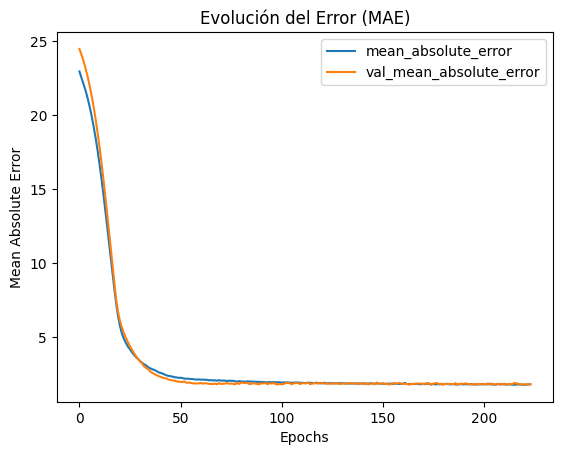

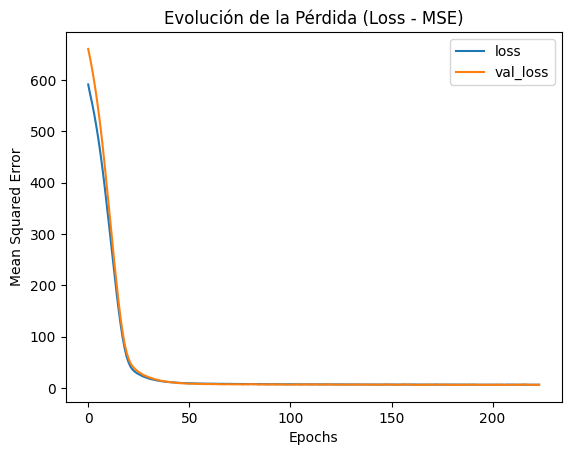

In [106]:
history_df_cb = pd.DataFrame(history_cb.history)
history_df_cb[["mean_absolute_error", "val_mean_absolute_error"]].plot(title="Evolución del Error (MAE)")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")

history_df_cb[["loss", "val_loss"]].plot(title="Evolución de la Pérdida (Loss - MSE)")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")

plt.show()

In [112]:
mae_medio = history_df_cb["val_mean_absolute_error"].iloc[-175:].mean()
print(f"MAE medio después de estabilización: {mae_medio}")

MAE medio después de estabilización: 1.8453904444830758


Interpreta el gráfico

### Ejercicio 13

Veamos qué tan bien generaliza el modelo al usar el conjunto de **test**. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real. Utiliza el método `evaluate` con los datos de test normalizados y sus labels.

Con el método evaluate devolverá tres valores: loss, mae y mse.

In [113]:
test_eval= model_cb.evaluate(X_test_scaled,y_test)
test_eval

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.8419 - mean_absolute_error: 1.7987 - mean_squared_error: 5.8419


[6.369978904724121, 6.369978904724121, 1.8332618474960327]

### Ejercicio 14

Dibuja en un scatter plot las predicciones de test vs sus true labels.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


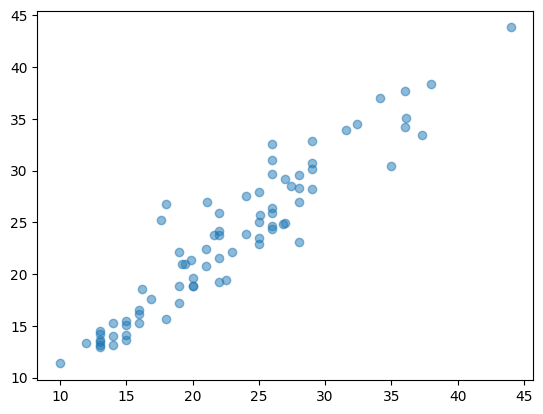

In [115]:
y_pred = model_cb.predict(X_test_scaled)
plt.scatter(y_test, y_pred, alpha=0.5)  # alpha=0.5 para hacer los puntos más visibles
plt.show()
